🚨 **LangServe / Langchain Templates 正在快速開發中，之後可能會增加更多功能或改變使用體驗**🚨

# 1. What is LangServe?
LangServe(你做的 Langhcain Object) -> API, UI。讓你能快速部署你的應用。

# 2. Serve

In [ ]:
import os
from fastapi import FastAPI
from langchain.prompts import ChatPromptTemplate
from langchain_setup import ChatOpenAI
from langchain.schema.runnable import ConfigurableField

from langserve import add_routes

# [Optional] Automatically trace with LangSmith
# export LANGCHAIN_TRACING_V2=true
# export LANGCHAIN_ENDPOINT=https://api.smith.langchain.com
# export LANGCHAIN_API_KEY=<your-api-key>
# export LANGCHAIN_PROJECT=<your-project>  # if not specified, defaults to "default"


chat_prompt = ChatPromptTemplate.from_template("像向{years}歲小孩解釋一樣，盡可能簡短地告訴我什麼是{concept}。")
model = ChatOpenAI(temperature=0).configurable_fields(
    temperature=ConfigurableField(
        id="llm_temperature",
        name="LLM Temperature",
        description="The temperature of the LLM",
    )
)
runnable = chat_prompt | ChatOpenAI() # 可以是任何超級複雜的應用，只要它是 Runnable 或 Chain

app = FastAPI()
add_routes(app, runnable, path='/explain')

# Jupyter notebook 內無法執行 fastapi
# if __name__ == "__main__":
#     import uvicorn
#     uvicorn.run(app, host="localhost", port=8000)

# 3. 使用範例
實際操作一個最基礎的範例

# 3.1 直接 Request

In [6]:
import requests

inputs = {"input": {"years": "三", "concept": "母胎單身"}}
response = requests.post("http://localhost:8000/explain/invoke", json=inputs)

response.json()

{'output': {'content': '母胎單身是指一個女性在懷孕期間並沒有結婚或有伴侶的情況下，獨自一人承擔孕育和生育的過程。這意味著這個女性沒有一個男性伴侶來幫助她照顧和支持她在孕期和產後的需要。\n\n有些女性可能選擇母胎單身，因為她們可能沒有找到合適的伴侶，或者她們可能希望獨自決定自己的生育計劃。這需要很大的勇氣和責任感，因為孕育和照顧一個小孩是一個非常重要的工作。\n\n即使沒有一個男性伴侶，這些女性仍然可以通過醫療技術，如人工授精或代孕，來實現懷孕和生育。她們可能會得到家人和朋友的支持，以及醫生和其他專業人士的幫助。\n\n母胎單身的女性可能會面臨一些挑戰，但她們也可以成為非常堅強和愛心的媽媽。她們會學習如何照顧和愛護自己的孩子，並且會努力提供他們所需的一切。\n\n所以，當我們談到母胎單身時，我們應該理解並尊重這些女性的選擇和努力，並給予她們支持和鼓勵。',
  'additional_kwargs': {},
  'type': 'ai',
  'example': False},
 'callback_events': [],
 'metadata': {'run_id': '80d9e389-08c1-4695-91b1-a441deca44dc'}}

## 3.2 Client (Python SDK)

In [3]:
import langchain_setup
from langserve import RemoteRunnable

runnable = RemoteRunnable('http://localhost:8000/explain')
runnable.invoke({"years": "三", "concept": "母胎單身"}, config={'configurable':{'llm_temperature': 0.3}})

AIMessage(content='母胎單身是指一個女性在懷孕期間並沒有結婚或有伴侶的情況下，獨自一人承擔孕育和生育的過程。這意味著這個女性沒有一個丈夫或伴侶來幫助她照顧和支持她在孕期和產後的需要。\n\n有些女性可能選擇母胎單身，因為她們可能沒有找到合適的伴侶，或者她們可能希望獨自決定自己的生育計劃。這需要很大的勇氣和責任感，因為孕育和照顧一個小孩是一個非常重要的工作。\n\n即使沒有一個伴侶，這些母胎單身的女性仍然可以成為一個偉大的母親。她們可以尋求家人、朋友或其他支持系統的幫助，來照顧和支持她們的孩子。這些女性也可以選擇在孩子長大後告訴他們關於他們的出生方式，並解釋為什麼她們選擇了母胎單身。\n\n最重要的是，無論一個孩子是由一個父母還是母胎單身的母親養育，他們都會被愛和關心。這是最重要的，因為愛是建立一個幸福和健康的家庭的基礎。')

Async 方式

In [5]:
await runnable.ainvoke({"years": "三", "concept": "母胎單身"})

AIMessage(content='母胎單身是指一個女性在懷孕期間並沒有結婚或有伴侶的情況下，獨自一人承擔孕育和生育的過程。這意味著這個女性沒有一個男性伴侶來幫助她照顧和支持她在孕期和產後的需要。\n\n有些女性可能選擇母胎單身，因為她們可能沒有找到合適的伴侶，或者她們可能希望獨自決定自己的生育計劃。這需要很大的勇氣和責任感，因為孕育和照顧一個小孩是一個非常重要的工作。\n\n即使沒有一個男性伴侶，這些女性仍然可以通過醫療技術，如人工授精或代孕，來實現懷孕和生育。她們可能會得到家人和朋友的支持，以及醫生和其他專業人士的幫助。\n\n母胎單身的女性可能需要更多的努力和時間來照顧自己和孩子，但她們也可以成為一個非常愛孩子的好媽媽。無論是有伴侶還是母胎單身，每個孩子都是特別的，都可以在一個愛的環境中茁壯成長。')

# 3.3 UI
![langserve playground.png](<attachment:langserve playground.png>)
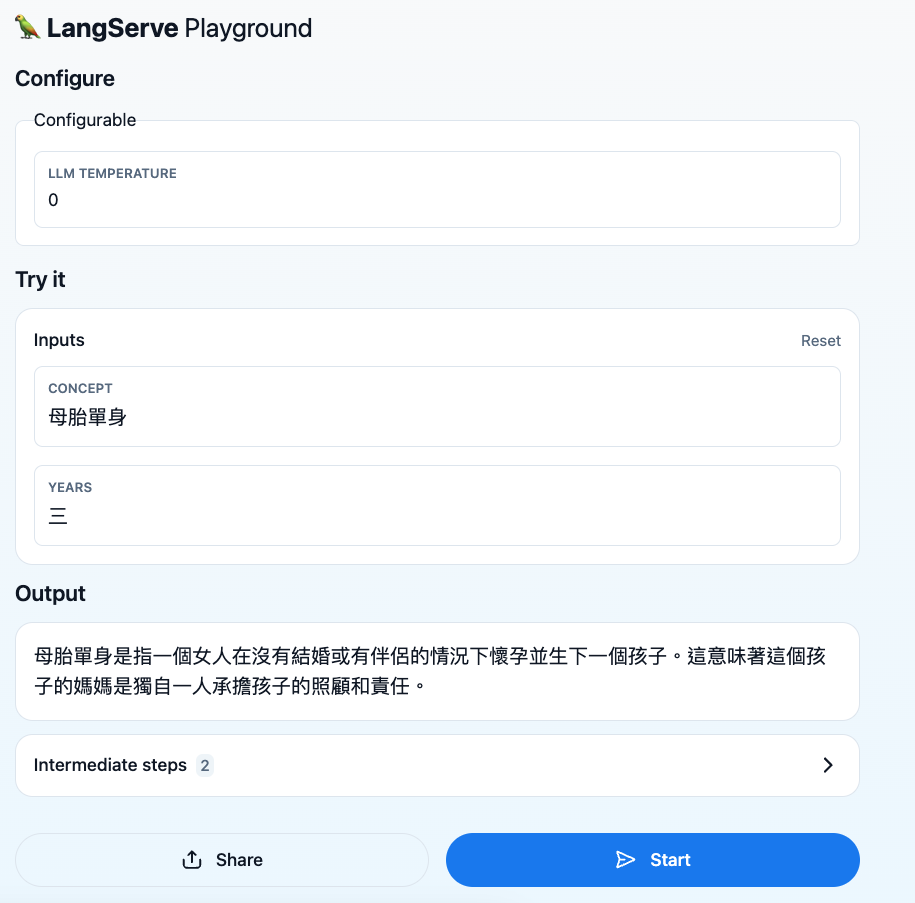

# 4. 功能介紹
- 依照 Input schema 、 Output schema 、 Configuration fields 自動產生 API & UI
- API
    - `POST /<NAME>/invoke` - invoke the runnable on a single input
    - `POST /<NAME>/batch` - invoke the runnable on a batch of inputs
    - `POST /<NAME>/stream `- invoke on a single input and stream the output
    - `POST /<NAME>/stream_log` - invoke on a single input and stream the output, including output of intermediate steps as it's generated
    - `GET /<NAME>/input_schema` - json schema for input to the runnable
    - `GET /<NAME>/output_schema` - json schema for output of the runnable
    - `GET /<NAME>/config_schema` - json schema for config of the runnable
    - `/docs` - OpenAPI docs
- UI
    - 如上圖
- Langsmith 支援
    - 在 Server 端的程式碼設置相關的環境變數後就能自動使用 LangSmith 的紀錄功能，方便 debugging 和 Monitoring

# 5. Langhchain Templates
- Langchain Template 是一個 hub，提供現成的 Runnable 或是元件 (如很複雜的 retriever)。 透過其 Langchain CLI ，可以不需要寫程式直接將該服務透過 LangServe 上線，享受其 API, UI。
- Langchain Template 的目的是更進一步加速從點子到應用部署的速度，直接套用或組合現成的應用來快速做出自己的應用。
- 跟 Langchain Hub 不一樣的是，Langchain Hub 只有分享 Prompt 內容。Langchain Templates 則是直接分享整個應用。有時還會自動安裝該應用所需的套件，由此可見其與 Langchain Hub 的不同

詳細可見官方說明

# 